In [32]:
# Importando as bibliotecas necessárias para análise de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## *Análise exploratória dos dados inicial*



In [2]:
# Carregando os dados
df = pd.read_csv("https://raw.githubusercontent.com/adnilsomar/layoffs-2020-2024/main/layoffs_data.csv")

In [3]:
# Visualização das primeiras linhas do conjunto de dados
df.head()

,Company,Location_HQ,Industry,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,Laid_Off_Count,List_of_Employees_Laid_Off
0,Farfetch,London,Retail,0.25,2024-02-16,https://ominho.pt/depois-da-saida-do-ceo-de-gu...,1700.0,Acquired,2024-02-16 18:39:00,United Kingdom,NaN,Unknown
1,Toast,Boston,Food,0.10,2024-02-15,https://www.bloomberg.com/news/articles/2024-0...,962.0,Post-IPO,2024-02-15 16:48:04,United States,550.0,Unknown
2,Storytel,Stockholm,Consumer,0.13,2024-02-15,https://investors.storytel.com/en/wp-content/u...,312.0,Post-IPO,2024-02-16 18:37:24,Sweden,80.0,Unknown
3,Gro Intelligence,New York City,Food,0.10,2024-02-15,https://agfundernews.com/ai-powered-ag-insight...,118.0,Series B,2024-02-16 18:35:19,United States,20.0,Unknown
4,CodeSee,SF Bay Area,Data,1.00,2024-02-15,https://www.linkedin.com/posts/shaneak_i-am-ve...,10.0,Seed,2024-02-15 19:34:43,United States,NaN,Unknown


In [4]:
# Informações gerais dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3454 non-null   object 
 1   Location_HQ                 3454 non-null   object 
 2   Industry                    3454 non-null   object 
 3   Percentage                  2226 non-null   float64
 4   Date                        3454 non-null   object 
 5   Source                      3454 non-null   object 
 6   Funds_Raised                3088 non-null   float64
 7   Stage                       3454 non-null   object 
 8   Date_Added                  3454 non-null   object 
 9   Country                     3454 non-null   object 
 10  Laid_Off_Count              2269 non-null   float64
 11  List_of_Employees_Laid_Off  3453 non-null   object 
dtypes: float64(3), object(9)
memory usage: 323.9+ KB


In [8]:
# Paises no conjunto de dados
country = df['Country'].unique()
country

array(['United Kingdom', 'United States', 'Sweden', 'India', 'Israel',
       'Finland', 'Canada', 'Cayman Islands', 'Czech Republic',
       'Lithuania', 'Nigeria', 'Germany', 'Austria', 'Indonesia', 'Japan',
       'Estonia', 'Pakistan', 'Netherlands', 'Singapore', 'China',
       'France', 'Poland', 'Romania', 'Switzerland', 'Brazil', 'Ghana',
       'Hong Kong', 'Kenya', 'Norway', 'Spain', 'Australia', 'Ireland',
       'New Zealand', 'Luxembourg', 'Mexico', 'South Korea', 'Chile',
       'Saudi Arabia', 'Philippines', 'Ukraine', 'Italy', 'Portugal',
       'Colombia', 'Argentina', 'Seychelles', 'Egypt', 'Greece',
       'Belgium', 'Denmark', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand',
       'Senegal', 'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Myanmar'],
      dtype=object)

In [9]:
# Valores únicos de los setores das empresas
industry = df['Industry'].unique()
industry

array(['Retail', 'Food', 'Consumer', 'Data', 'Transportation',
       'Infrastructure', 'Finance', 'Healthcare', 'Other', 'Travel',
       'Crypto', 'Security', 'HR', 'Sales', 'Fitness', 'Education',
       'Product', 'Media', 'Energy', 'Logistics', 'Marketing',
       'Manufacturing', 'Hardware', 'Real Estate', 'Support',
       'Recruiting', 'AI', 'Construction', 'Aerospace', 'Legal',
       'Unknown'], dtype=object)

In [10]:
#Valores unicos do stage da empresa
stage = df['Stage'].unique()
stage

array(['Acquired', 'Post-IPO', 'Series B', 'Seed', 'Series D', 'Series A',
       'Unknown', 'Series F', 'Series C', 'Series E', 'Private Equity',
       'Series H', 'Subsidiary', 'Series G', 'Series I', 'Series J'],
      dtype=object)

In [7]:
# Estatísticas descritivas para as variáveis numéricas
df.describe()

,Percentage,Funds_Raised,Laid_Off_Count
count,2226.000000,3088.00000,2269.000000
mean,0.279100,766.30667,248.837814
std,0.284685,4793.75333,779.997212
min,0.000000,0.00000,3.000000
25%,0.100000,51.00000,40.000000
50%,0.170000,164.00000,80.000000
75%,0.300000,458.25000,180.000000
max,1.000000,121900.00000,12000.000000


In [11]:
# Verificando os valores nulos do conjunto de dados
df.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Percentage                    1228
Date                             0
Source                           0
Funds_Raised                   366
Stage                            0
Date_Added                       0
Country                          0
Laid_Off_Count                1185
List_of_Employees_Laid_Off       1
dtype: int64

In [15]:

# Verificando os valores duplicados no conjunto de dados:
duplicates_all = df.duplicated().sum()
print(duplicates_all)

0


## *Tratamento dos dados*

In [16]:
# Removendo as colunas que podem conter informações que não são relevantes para a análise atual.
#  Removê-las simplifica o DataFrame e foca nas colunas mais importantes para a análise que será realizada.
df=df.drop(['Location_HQ','Source','Date_Added','List_of_Employees_Laid_Off', 'Funds_Raised'],axis=1)

In [17]:
df.head()

,Company,Industry,Percentage,Date,Stage,Country,Laid_Off_Count
0,Farfetch,Retail,0.25,2024-02-16,Acquired,United Kingdom,NaN
1,Toast,Food,0.10,2024-02-15,Post-IPO,United States,550.0
2,Storytel,Consumer,0.13,2024-02-15,Post-IPO,Sweden,80.0
3,Gro Intelligence,Food,0.10,2024-02-15,Series B,United States,20.0
4,CodeSee,Data,1.00,2024-02-15,Seed,United States,NaN


In [18]:
# Remove as linhas onde há valores nulos entes em pelo menos uma das colunas 'Laid_Off_Count', 'Percentage'.
#Isso é útil para garantir que esteja trabalhando com dados completos e evitar erros ao realizar análises.
df=df.dropna(how='any', subset=['Laid_Off_Count','Percentage'])

A decisão de eliminar os valores ausentes foi tomada porque a coluna 'Percentage' não pode ser imputada (preenchida) de forma confiável. Essa coluna representa a porcentagem de funcionários demitidos em relação ao tamanho da empresa, e é uma medida crucial para entender o impacto das demissões. Como não há uma maneira precisa de estimar esses valores ausentes, removê-los é preferível para evitar distorções nos dados.

Também acabamos removendo linhas com valores ausentes em outras colunas, como 'Laid_Off_Count', que também são importantes para a análise. Embora isso resulte na perda de uma parte significativa dos dados, é preferível manter a integridade e a precisão dos dados restantes para análises futuras. A remoção dessas linhas nos permite trabalhar com um conjunto de dados mais completo e confiável, mesmo que isso signifique uma redução no tamanho do conjunto de dados.

In [19]:
df.isnull().sum()

Company           0
Industry          0
Percentage        0
Date              0
Stage             0
Country           0
Laid_Off_Count    0
dtype: int64


Transformação do tipo de dados

In [24]:
#Tipo de dato da coluna "Laid_Off_Count"
df['Laid_Off_Count'].dtype

dtype('float64')

In [26]:
# Transformação do tipo de dados da coluna "List_of_Employees_Laid_Off" para int
df['Laid_Off_Count'] = df['Laid_Off_Count'].astype(int)
df['Laid_Off_Count'].dtype

dtype('int64')

In [28]:
#Tipo de dato da coluna "Date"
df['Date'].dtype

dtype('O')

In [29]:
# Transformação do tipo de dados da coluna "Date" para datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [31]:
# Valores únicos de los setores das empresas
date = df['Date'].dt.year.unique()
date

array([2024, 2023, 2022, 2021, 2020])

In [43]:
# Verificando porcentage de valores "Unknown" de coluna

# Calculando o total de valores "Unknown" na coluna "Industry"
total_unknown = (df['Industry'] == 'Unknown').sum()

# Calculando o total de valores na coluna "Industry"
total_valores = df['Industry'].notnull().sum()

# Calculando a porcentagem de "Unknown"
porcentagem_unknown = (total_unknown / total_valores) * 100
print(porcentagem_unknown)



0.062266500622665005


In [44]:
# Substituindo os valores "Unknown" por "Other" na coluna 'Industry'
df['Industry'] = df['Industry'].replace('Unknown', 'Other')

# *Análise exploratória dos dados*

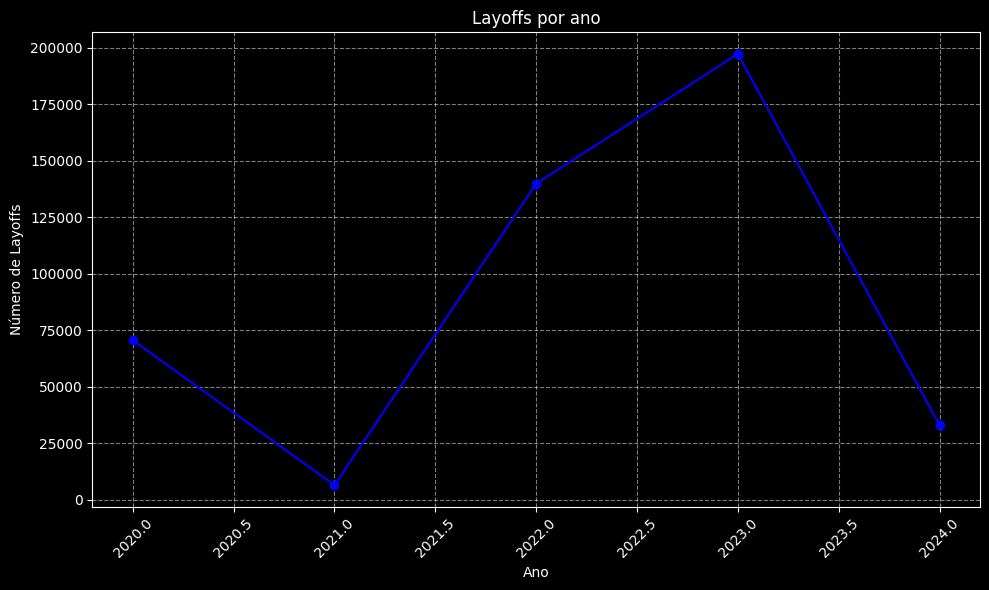

In [37]:
# Quantidade de layoffs por ano.

# Extraindo o ano da coluna de data
df['Year'] = df['Date'].dt.year

# Agrupando os dados por ano e somar o número de demissões
layoffs_por_ano = df.groupby('Year')['Laid_Off_Count'].sum()

# Configurações de estilo
plt.style.use('dark_background')

# Plotando o diagrama de linha
plt.figure(figsize=(10, 6))
layoffs_por_ano.plot(kind='line', marker='o', color='b')
plt.title('Layoffs por ano')
plt.xlabel('Ano')
plt.ylabel('Número de Layoffs')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
fig = px.line(df, x='Date', y='Laid_Off_Count', title='Quantidade de demissões 2020-2024')
fig.update_layout(template='plotly_dark')
fig.show()

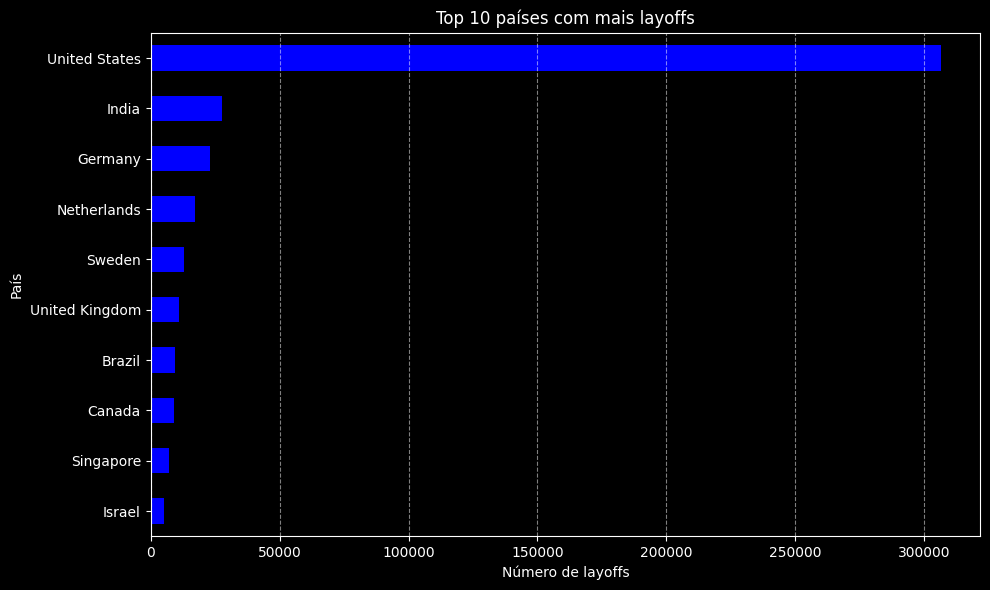

In [39]:
# Top 10 de paises com mais layoffs
layoffs_por_pais = df.groupby('Country')['Laid_Off_Count'].sum().nlargest(10)

# Plotando o gráfico de barras horizontal
plt.figure(figsize=(10, 6))
layoffs_por_pais.plot(kind='barh', color='b')
plt.title('Top 10 países com mais layoffs')
plt.xlabel('Número de layoffs')
plt.ylabel('País')
plt.gca().invert_yaxis()  # Inverter a ordem dos países
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

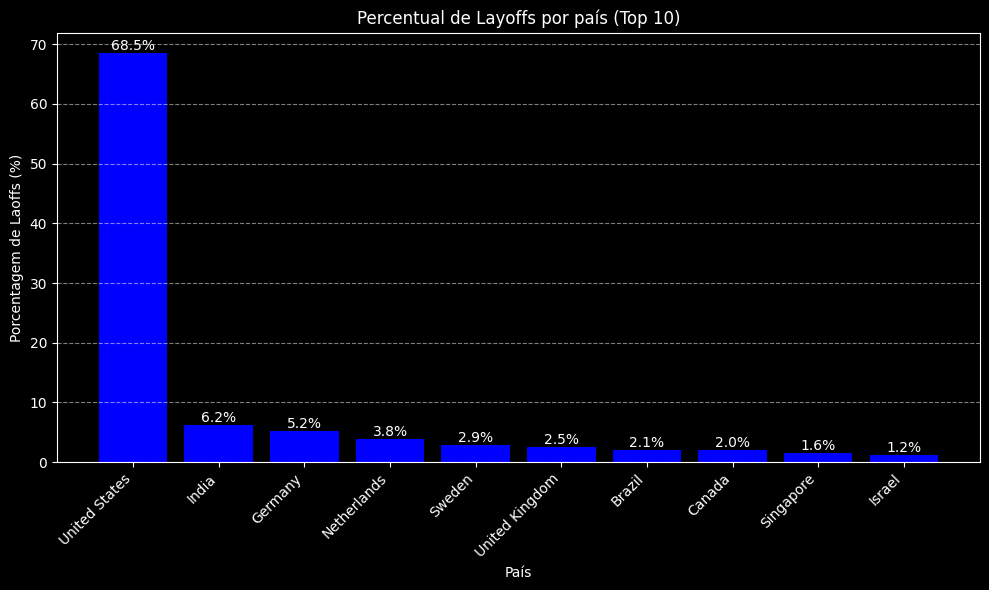

In [45]:
# Top 10 de percentual de Layoffs por país

# Calculaando o total de lay-offs
total_layoffs = df['Laid_Off_Count'].sum()

# Agrupar os dados por país e somar o número de demissões
layoffs_por_pais = df.groupby('Country')['Laid_Off_Count'].sum().nlargest(10)

# Calculaando o percentual de lay-offs para os 10 primeiros países
layoffs_por_pais_percent = (layoffs_por_pais / total_layoffs) * 100

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(layoffs_por_pais_percent.index, layoffs_por_pais_percent.values, color='b')

# Adicionando as etiquetas de porcentagem acima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%',
             ha='center', va='bottom', color='white')

plt.title('Percentual de Layoffs por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Porcentagem de Laoffs (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

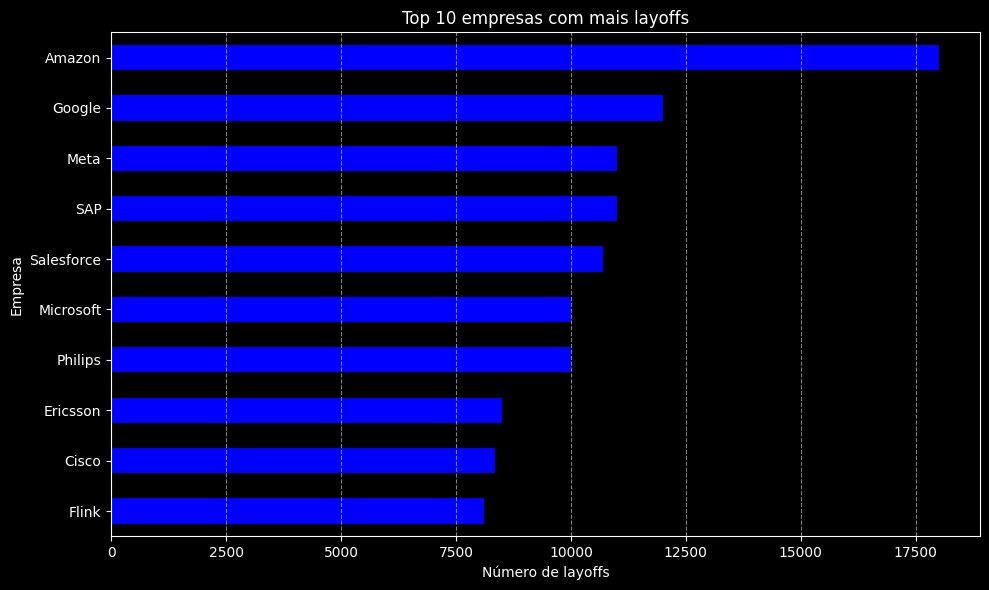

In [46]:
layoffs_por_empresa = df.groupby('Company')['Laid_Off_Count'].sum().nlargest(10)

# Plotando o gráfico de barras horizontal das principais empresas
plt.figure(figsize=(10, 6))
layoffs_por_empresa.plot(kind='barh', color='b')
plt.title('Top 10 empresas com mais layoffs')
plt.xlabel('Número de layoffs')
plt.ylabel('Empresa')
plt.gca().invert_yaxis()  # Invertendo a ordem das empresas
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

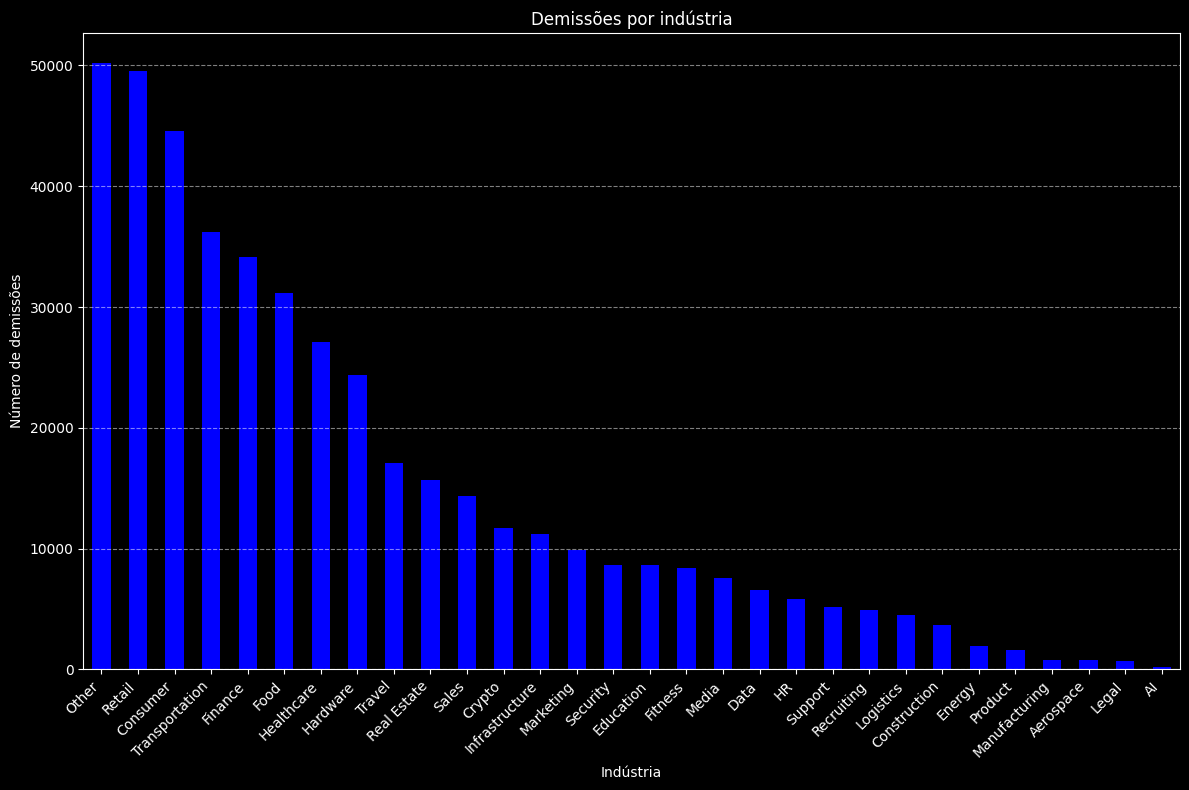

In [47]:
# Layoffs por industrias

layoffs_por_industria = df.groupby('Industry')['Laid_Off_Count'].sum()

# Plotando o gráfico de barras vertical para todas as indústrias
plt.figure(figsize=(12, 8))
layoffs_por_industria.sort_values(ascending=False).plot(kind='bar', color='b')
plt.title('Demissões por indústria')
plt.xlabel('Indústria')
plt.ylabel('Número de demissões')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Principais Achados:**

O pico de demissões em 2023 pode ser atribuído a uma combinação de fatores, incluindo fatores econômicos que têm afetado nos anos 2022 e 2023, outros fatores que podem ter contribuido são os Impactos contínuos da pandemia e os grandes avanços tecnológicos no ano 2023.

Empresas de tecnologia como Amazon, Google e Meta estão entre as líderes em demissões, destacando a influência das rápidas mudanças e inovações tecnológicas no mercado de trabalho.

**Próximos Passos:**

1. Realizar uma análise mais aprofundada dos fatores específicos que contribuíram para o pico de demissões em 2023, e como estes fatores podem afetar nos proximos anos.
2. Explorar oportunidades de mitigar os efeitos das demissões nas empresas de tecnologia, como investir em programas de treinamento e desenvolvimento para requalificação de funcionários ou ajustes nas estratégias de gestão de talentos.

**Potenciais Ganhos para o Negócio:**

1. Melhoria da capacidade de prever e responder a flutuações no mercado de trabalho, permitindo ajustes mais rápidos e eficazes nas estratégias de gestão de pessoal.
2. Maior competitividade e resiliência organizacional, possibilitando uma adaptação mais ágil às mudanças econômicas e tecnológicas.
3. Maximização do potencial de retenção de talentos e desenvolvimento de uma força de trabalho mais diversificada e qualificada.
4. Fortalecimento da reputação da empresa como um empregador responsável e comprometido com o bem-estar dos funcionários.

Em resumo, ao entender os principais achados e implementar os próximos passos identificados, o negócio pode alcançar ganhos significativos em termos de eficácia operacional, satisfação do funcionário e vantagem competitiva no mercado.




